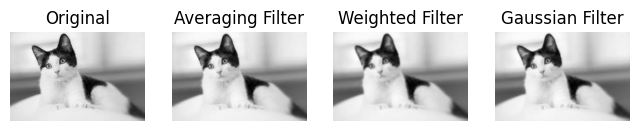

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("../dataset/src.jpeg",0)

avg = cv2.blur(img, (2, 2)) # average

mask = np.zeros((3,3), dtype=np.float32)
for i in range(3):
    for j in range(3):
        mask[i,j] = max(abs(i-1), abs(j-1))   # center = (1,1)
mask = mask / mask.sum()                     # normalize
weighted = cv2.filter2D(img, -1, mask)

gauss = cv2.GaussianBlur(img, (3, 3), 0)


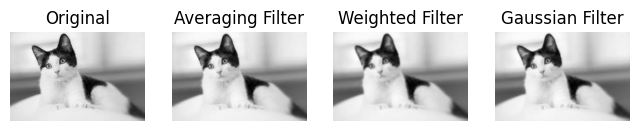

In [4]:

titles = ["Original", "Averaging Filter", "Weighted Filter", "Gaussian Filter"]
images = [img, avg, weighted, gauss]

plt.figure(figsize=(8,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()
